<a href="https://colab.research.google.com/github/DipeshChothwe/Image-classification-Jeans-and-Trousers/blob/master/Cardiovascular_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/cardio_train.csv", sep = ';', na_values = '.')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


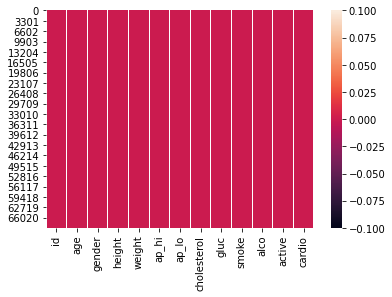

In [4]:
df.shape
df.dtypes
df.info()
df.isnull()
df.isnull().sum()
sns.heatmap(df.isnull())
df.describe()

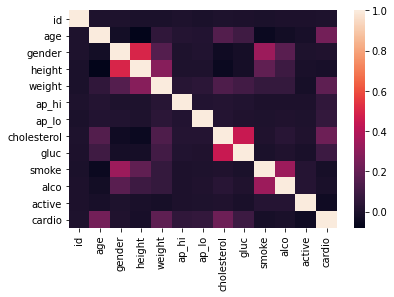

In [5]:
sns.heatmap(df.corr())


In [6]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


In [7]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,988,22469,1,155,69.0,130,80,2,2,0,0,1
1,989,14648,1,163,71.0,110,70,1,1,0,0,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1
3,991,14549,2,165,85.0,120,80,1,1,1,1,1
4,992,23393,1,155,62.0,120,80,1,1,0,0,1


In [8]:
df.groupby(y).count()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
cardio,,,,,,,,,,,,,
0,34679,34679,34679,34679,34679,34679,34679,34679,34679,34679,34679,34679,34679
1,34622,34622,34622,34622,34622,34622,34622,34622,34622,34622,34622,34622,34622


In [9]:
from sklearn.preprocessing import StandardScaler
minmax = StandardScaler()
x = minmax.fit_transform(x)

x

array([[-1.73243929,  1.21601824, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73240428, -1.95391548, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       [-1.73236927,  0.98580185, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463],
       ...,
       [ 1.7338761 , -0.16325352,  1.36421285, ..., -0.31072844,
         4.19040018, -2.02525646],
       [ 1.73394612,  1.20061644, -0.73302344, ..., -0.31072844,
        -0.23864069, -2.02525646],
       [ 1.73398113,  0.43417421, -0.73302344, ..., -0.31072844,
        -0.23864069,  0.49376463]])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 50)

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_train = lr.predict(x_train)
print(confusion_matrix(y_test,lr_pred))
print("test classification report:")
print(classification_report(y_test,lr_pred))

print("train classification report:")
print(classification_report(y_train,lr_pred_train))


[[8614 2647]
 [3762 7847]]
test classification report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     11261
           1       0.75      0.68      0.71     11609

    accuracy                           0.72     22870
   macro avg       0.72      0.72      0.72     22870
weighted avg       0.72      0.72      0.72     22870

train classification report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     23418
           1       0.74      0.67      0.71     23013

    accuracy                           0.72     46431
   macro avg       0.72      0.72      0.72     46431
weighted avg       0.72      0.72      0.72     46431



In [11]:
y_prob = lr.predict_proba(x_test)[:,1] 

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7841514965441969

Text(0.5, 0, 'False Positive Rate')

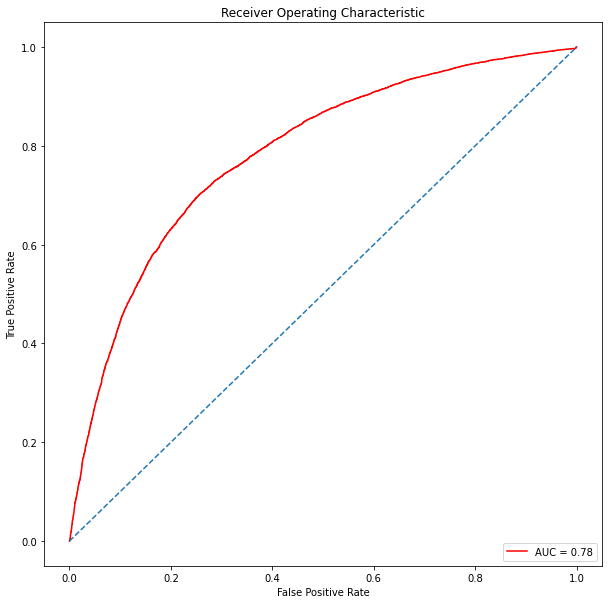

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[ 1.37976765,  1.83151851, -0.67774407, ...,  0.0388733 ,
         0.3696706 ,  0.13846079],
       [ 0.65171792, -1.26010012, -0.13205836, ...,  0.09257232,
        -0.02227915, -0.13264765],
       [ 0.75010117, -0.33710246,  0.11452662, ..., -0.14954954,
         0.22923106, -0.59062177],
       ...,
       [-3.8885354 ,  1.75093377, -0.00710186, ..., -2.64367518,
        -2.09456472, -0.15600718],
       [ 0.87540604,  0.93825153,  0.59089828, ..., -0.22252603,
         1.38492947, -0.40080204],
       [ 0.34156754,  0.48287964,  0.17388276, ..., -0.16354521,
        -0.85849197, -1.03799295]])

In [14]:
covariance=pca.get_covariance()

explained_variance=pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance

array([1.94074786, 1.5783407 , 1.13351339, 1.01615443, 1.00138509,
       0.98919198, 0.9815833 , 0.93439994, 0.80888637, 0.62706132,
       0.53910675, 0.44980203])

No handles with labels found to put in legend.


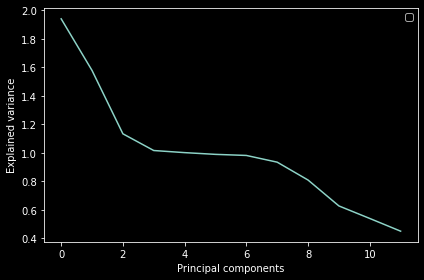

In [15]:
with plt.style.context('dark_background'):
    plt.figure()
    
    plt.plot(explained_variance)
    plt.ylabel('Explained variance')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.tight_layout()

No handles with labels found to put in legend.


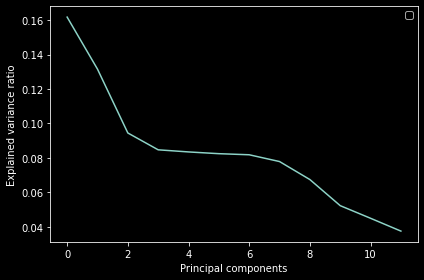

In [16]:
with plt.style.context('dark_background'):
    plt.figure()

    
    plt.plot(explained_variance_ratio)
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.tight_layout()